# 1. Logistic regression

## Exercise 1: Import needed modules

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

# Importing linear regression function
import sklearn.linear_model as lm

# Functions to calculate r-squared, MAE, RMSE
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

%matplotlib inline

**Question:**
1. For what purpose each of these modules was imported?

**Answer:**

## Exercise 2: Input data
Let's consider a use case where we have to predict students' test outcome i.e., **pass** (**1**) or **fail** (**0**) based on hours studied. In this case the outcome to be predicted is **discrete**.

In [2]:
# Load data
df = pd.read_csv('Grade_Set_1_Classification.csv')

print (df)

   Hours_Studied  Result
0              2       0
1              3       0
2              4       0
3              5       1
4              6       1
5              7       1
6              8       1
7              9       1
8             10       1


**Question:**
1. On what scales the individual variables are measured?

**Answer:**

## Exercise 3: Fit linear regression
To classify the observation into **pass** or **fail** (**1** or **0**), let's build a linear regression and try to use a threshold i.e. anything over some value is **pass**, else **fail**.

R-squared: 0.675
Mean Absolute Error: 0.2296296296296296
Root Mean Squared Error: 0.26874192494328497


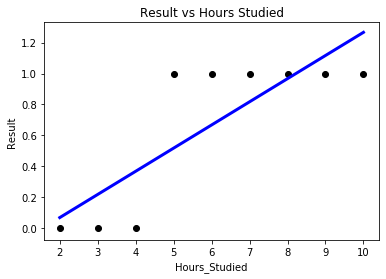

In [3]:
x = df.Hours_Studied[:, np.newaxis] # Independent variable
y = df.Result                       # Dependent variable 

# Create linear regression object
lr = lm.LinearRegression()

# Train the model using the training sets
lr.fit(x, y)

# Plotting fitted line
plt.scatter(x, y, color = 'black')
plt.plot(x, lr.predict(x), color = 'blue', linewidth = 3)
plt.title('Result vs Hours Studied')
plt.ylabel('Result')
plt.xlabel('Hours_Studied')

# Add predict value to the data frame
df['Result_Pred'] = lr.predict(x)

# Using built-in function
print ('R-squared:', r2_score(df.Result, df.Result_Pred))
print ('Mean Absolute Error:', mean_absolute_error(df.Result, df.Result_Pred))
print ('Root Mean Squared Error:', np.sqrt(mean_squared_error(df.Result, df.Result_Pred)))

**Questions:**
1. What result do we expect and what result have we obtained?
2. Is linear regression capable of setting boundries to the classification of observations? Justify your answer.
3. Can you propose another, better solution to this problem?

**Answers:**

## Exercise 4: Sigmoid function
Draw a plot of the sigmoid function.

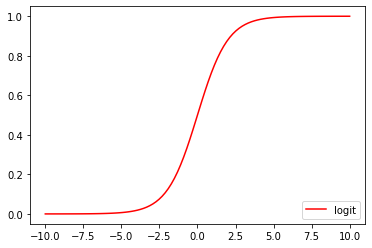

In [4]:
# Plot sigmoid function
x = np.linspace(-10, 10, 100)
y = 1.0 / (1.0 + np.exp(-x))

plt.plot(x, y, 'r-', label ='logit')
plt.legend(loc ='lower right')
plt.show()

**Question:**
1. In your opinion, can the sigmoid function be better to classify the observations under investigation than the linear function? Justify your answer.

**Answer:**

## Exercise 5: Fit logistic regression
The logistic regression model will use a sigmoid function.

Predicted probability: [0.05368062 0.15313611 0.36565616 0.64757973 0.85417548 0.94916743
 0.98347736 0.99475738 0.99834945]
Predicted Class: [0 0 0 1 1 1 1 1 1]


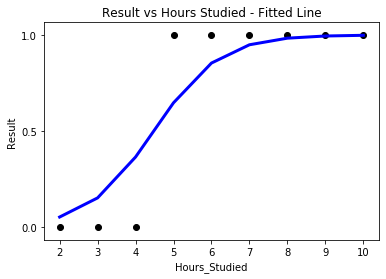

In [5]:
from sklearn.linear_model import LogisticRegression

# Manually add intercept
df['intercept'] = 1
independent_variables = ['Hours_Studied', 'intercept']

x = df[independent_variables]   # Independent variable
y = df['Result']                # Dependent variable 

# Instantiate a logistic regression model, and fit with x and y
model = LogisticRegression()
model = model.fit(x, y)

# Check the accuracy on the training set
model.score(x, y)

# The predict_proba() function returns array containing probability of y=0 and y=1
print ('Predicted probability:', model.predict_proba(x)[:,1])

# The predict() function gives convert the probability(y=1) values > 0.5 to 1 else 0
print ('Predicted Class:', model.predict(x))

# Plotting fitted line
plt.scatter(df.Hours_Studied, y,  color = 'black')
plt.yticks([0.0, 0.5, 1.0])
plt.plot(df.Hours_Studied, model.predict_proba(x)[:,1], color = 'blue', linewidth = 3)
plt.title('Result vs Hours Studied - Fitted Line')
plt.ylabel('Result')
plt.xlabel('Hours_Studied')
plt.show()

**Question:**
1. What is the idea of classification using a logistical regression model? Explain this in a few sentences.

**Answer:**

## Exercise 6: Model evaluation

In [6]:
from sklearn import metrics

# Generate evaluation metrics
print ('Accuracy:', metrics.accuracy_score(y, model.predict(x)))
print ('AUC:', metrics.roc_auc_score(y, model.predict_proba(x)[:,1]))

print ('Confusion matrix:\n', metrics.confusion_matrix(y, model.predict(x)))
print ('classification report:\n', metrics.classification_report(y, model.predict(x)))

Accuracy: 1.0
AUC: 1.0
Confusion matrix:
 [[3 0]
 [0 6]]
classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



**Question:**
1. How do you understand the individual performance metrics of the model?

**Answer:**

## Exercise 7: ROC curve

ROC AUC: 1.00


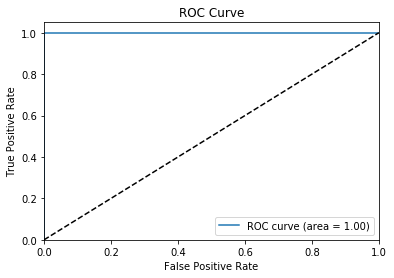

In [7]:
# Determine the false positive and true positive rates
fpr, tpr, _ = metrics.roc_curve(y, model.predict_proba(x)[:,1])
 
# Calculate the AUC
roc_auc = metrics.auc(fpr, tpr)
print ('ROC AUC: %0.2f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = 'lower right')
plt.show()

**Question:**
1. How can the model quality be evaluated on the basis of the ROC curve?

**Answer:**

## Exercise 8: Logistic regression diagnostics
Inverse of regularization *C* (default value is 1) is one of the key aspect of fitting logistic regression line.

C = 1 (default), Accuracy: 1.0
C = 10, Accuracy: 1.0
C = 100, Accuracy: 1.0
C = 1000, Accuracy: 1.0


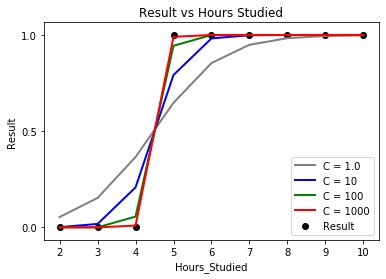

In [8]:
# Instantiate a logistic regression model with default C value, and fit with x and y
model = LogisticRegression()
model = model.fit(x, y)

# Check the accuracy on the training set
print ('C = 1 (default), Accuracy:', metrics.accuracy_score(y, model.predict(x)))

# Instantiate a logistic regression model with C=10, and fit with x and y
model1 = LogisticRegression(C = 10)
model1 = model1.fit(x, y)

# Check the accuracy on the training set
print ('C = 10, Accuracy:', metrics.accuracy_score(y, model1.predict(x)))

# Instantiate a logistic regression model with C=100, and fit with x and y
model2 = LogisticRegression(C = 100)
model2 = model2.fit(x, y)

# Check the accuracy on the training set
print ('C = 100, Accuracy:', metrics.accuracy_score(y, model2.predict(x)))

# Instantiate a logistic regression model with C=1000, and fit with x and y
model3 = LogisticRegression(C = 1000)
model3 = model3.fit(x, y)

# Check the accuracy on the training set
print ('C = 1000, Accuracy:', metrics.accuracy_score(y, model3.predict(x)))


# Plotting fitted line
plt.scatter(df.Hours_Studied, y,  color = 'black', label = 'Result')
plt.yticks([0.0, 0.5, 1.0])
plt.plot(df.Hours_Studied, model.predict_proba(x)[:,1], color = 'gray', linewidth = 2, label = 'C = 1.0')
plt.plot(df.Hours_Studied, model1.predict_proba(x)[:,1], color = 'blue', linewidth = 2,label='C = 10')
plt.plot(df.Hours_Studied, model2.predict_proba(x)[:,1], color = 'green', linewidth = 2,label = 'C = 100')
plt.plot(df.Hours_Studied, model3.predict_proba(x)[:,1], color = 'red', linewidth = 2,label = 'C = 1000')
plt.legend(loc = 'lower right') # Legend location
plt.title('Result vs Hours Studied')
plt.ylabel('Result')
plt.xlabel('Hours_Studied')
plt.show()

**Question:**
1. How does the *C* value affect the complexity of the model?

**Answer:**

# 2. Multivariable and multi-class logistic regression
Let’s learn multiclass prediction with **Iris** dataset which contains 3 classes of 50 instances each, where each class refers to a type of Iris plant. 

## Exercise 9: Import needed modules

In [9]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
import numpy as np
import pandas as pd

iris = datasets.load_iris()

X = iris.data
Y = iris.target

print('Class labels:', np.unique(Y))

Class labels: [0 1 2]


**Question:**
1. For what purpose each of these modules was imported?

**Answer:**

## Exercise 10: Normalize and split data

In [10]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

# Split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

**Question:**
1. What is the meaning of the operations performed? Explain them exactly.

**Answer:**

## Exercise 11: Train and evaluate the logistic regression model

In [11]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty = 'l2', C = 10, random_state = 0)
lr.fit(X_train, Y_train)

from sklearn import metrics

# Generate evaluation metrics
print('Train - Accuracy:', metrics.accuracy_score(Y_train, lr.predict(X_train)))
print('Train - Confusion matrix:\n', metrics.confusion_matrix(Y_train, lr.predict(X_train)))
print('Train - classification report:\n', metrics.classification_report(Y_train, lr.predict(X_train)))

print('Test - Accuracy:', metrics.accuracy_score(Y_test, lr.predict(X_test)))
print('Test - Confusion matrix:\n', metrics.confusion_matrix(Y_test, lr.predict(X_test)))
print('Test - classification report:\n', metrics.classification_report(Y_test, lr.predict(X_test)))

Train - Accuracy: 0.9809523809523809
Train - Confusion matrix:
 [[34  0  0]
 [ 0 31  1]
 [ 0  1 38]]
Train - classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.97      0.97      0.97        32
           2       0.97      0.97      0.97        39

    accuracy                           0.98       105
   macro avg       0.98      0.98      0.98       105
weighted avg       0.98      0.98      0.98       105

Test - Accuracy: 0.9777777777777777
Test - Confusion matrix:
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Test - classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0

**Question:**
1. What conclusions can you draw from the comparison of the model evaluation results for the training and test set?

**Answer:**

# 3. Logistic regression diagnostics
Overfitting occurs when the model fits the data very well capturing all the noises. Let's understand the issue by looking at some example dataset.

## Exercise 12: Fitting logistic regression for two independent variables which are linearly separable

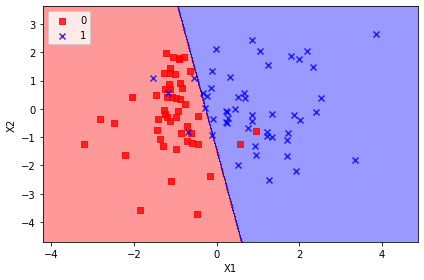

In [12]:
# Let's use sklearn make_classification() function to create some test data.
from sklearn.datasets import make_classification
X, Y = make_classification(100, 2, 2, 0, weights = [0.5, 0.5], random_state = 0) 

# Build a simple logistic regression model
clf = LogisticRegression().fit(X, Y)

def plot_decision_regions(X, Y, classifier):
    
    h = 0.02  # Step size in the mesh
    # Setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(Y))])

    # Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.4, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(Y)):
        plt.scatter(x = X[Y == cl, 0], y = X[Y == cl, 1],
                    alpha = 0.8, color = cmap(idx),
                    marker = markers[idx], label = cl)
        
# Plot the decision boundary
plot_decision_regions(X, Y, classifier = clf)
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

**Question:**
1. In your opinion, does the model of simple logistic regression built up discriminate well against the data set? Justify your answer.

**Answer:**

## Exercise 13: Fitting logistic regression for two independent variables which are non-linearly separable

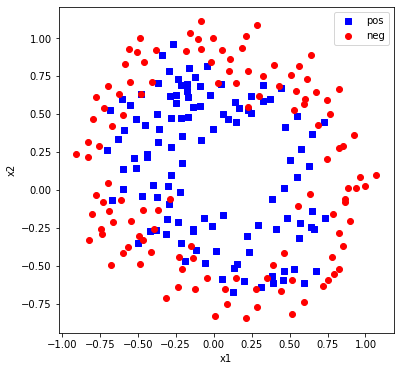

In [13]:
import pandas as pd
data = pd.read_csv('LR_NonLinear.csv')

pos = data['class'] == 1
neg = data['class'] == 0
x1 = data['x1']
x2 = data['x2']

def draw_plot():
    plt.figure(figsize = (6, 6))
    plt.scatter(np.extract(pos, x1), 
                np.extract(pos, x2), 
                c = 'b', marker = 's', label = 'pos')
    plt.scatter(np.extract(neg, x1), 
                np.extract(neg, x2), 
                c = 'r', marker = 'o', label = 'neg')
    plt.xlabel('x1');
    plt.ylabel('x2');
    plt.axes().set_aspect('equal', 'datalim')
    plt.legend();

draw_plot()

Create higher order polynomials for independent variable.

In [14]:
order_no = 6

# Map the variable 1 & 2 to its higher order polynomial
def map_features(variable_1, variable_2, order = order_no):
    assert order >= 1
    def iter():
        for i in range(1, order + 1):
            for j in range(i + 1):
                yield np.power(variable_1, i - j) * np.power(variable_2, j)
    return np.vstack(iter())
   
out = map_features(data['x1'], data['x2'], order = order_no)
X = out.transpose()
Y = data['class']

# Split the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

By default L2 is the regularization for logistic regression.

Train Accuracy for C = 0.002: 0.6181818181818182
Test Accuracy for C = 0.002: 0.6056338028169014

Train Accuracy for C = 1: 0.8363636363636363
Test Accuracy for C = 1: 0.8028169014084507

Train Accuracy for C = 10000: 0.8545454545454545
Test Accuracy for C = 10000: 0.8028169014084507


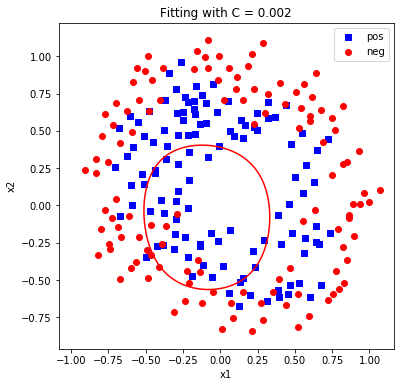

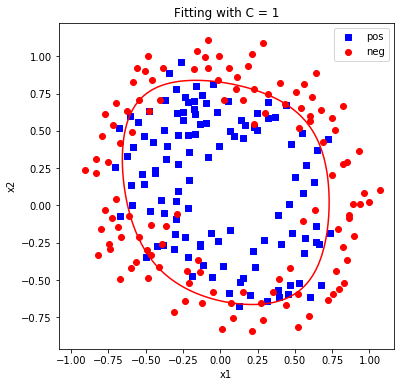

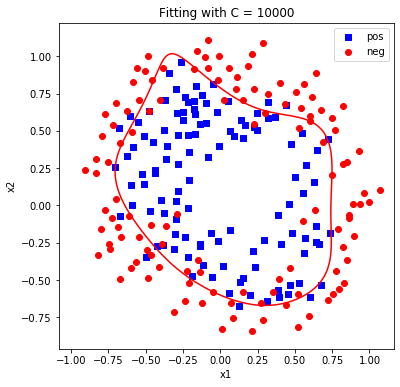

In [15]:
# Function to draw classifier line
def draw_boundary(classifier):
    dim = np.linspace(-0.8, 1.1, 100)
    dx, dy = np.meshgrid(dim, dim)
    v = map_features(dx.flatten(), dy.flatten(), order = order_no)
    z = (np.dot(classifier.coef_, v) + classifier.intercept_).reshape(100, 100)
    plt.contour(dx, dy, z, levels = [0], colors = ['r'])

# Fit with C = 0.002
clf = LogisticRegression(C = 0.002).fit(X_train, Y_train)
print('Train Accuracy for C = 0.002:', clf.score(X_train, Y_train))
print('Test Accuracy for C = 0.002:', clf.score(X_test, Y_test))
draw_plot()
plt.title('Fitting with C = 0.002')
draw_boundary(clf)
plt.legend(); 

# Fit with C = 1    
clf = LogisticRegression(C = 1).fit(X_train, Y_train)
print('\nTrain Accuracy for C = 1:', clf.score(X_train, Y_train))
print('Test Accuracy for C = 1:', clf.score(X_test, Y_test))
draw_plot()
plt.title('Fitting with C = 1')
draw_boundary(clf)
plt.legend();

# Fit with C = 10000    
clf = LogisticRegression(C = 10000).fit(X_train, Y_train)
print('\nTrain Accuracy for C = 10000:', clf.score(X_train, Y_train))
print('Test Accuracy for C = 10000:', clf.score(X_test, Y_test))
draw_plot()
plt.title('Fitting with C = 10000')
draw_boundary(clf)
plt.legend();

**Questions:**
1. How will you justify the decision boundary for the individual C values?
2. Which model do you think is the best? Justify your answer.

**Answers:**

# 4. Generalized linear model
Generalized linear model (GLM) allows to unify commonly used various statistical models such as linear, logistic, poission, etc. The model is selected using the so-called family parameter.

## Exercise 14: Model building
Lets consider a usecase where we have to predict students test outcome i.e., **pass** (**1**) or **fail** (**0**) based on hours studied. In this case the outcome to be predicted is **discrete**.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Importing linear regression function
import sklearn.linear_model as lm

# Function to calculate r-squared, MAE, RMSE
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error

%matplotlib inline

In [17]:
# Load data

df = pd.read_csv('Grade_Set_1.csv')
print(df)

   Hours_Studied  Test_Grade
0              2          57
1              3          66
2              4          73
3              5          76
4              6          79
5              7          81
6              8          90
7              9          96
8             10         100


In [18]:
print('####### Linear regression model ########')
# Create linear regression object
lr = lm.LinearRegression()

X = df.Hours_Studied[:, np.newaxis] # Independent variable
Y = df.Test_Grade.values            # Dependent variable 

# Train the model using the training sets
lr.fit(X, Y)

print('Intercept:', lr.intercept_)
print('Coefficient:', lr.coef_)

print('\n####### Generalized linear model ########')
import statsmodels.api as sm

# To be able to run GLM, we'll have to add the intercept constant to X variable
X = sm.add_constant(X, prepend = False)

# Instantiate a gaussian family model with the default link function.
model = sm.GLM(Y, X, family = sm.families.Gaussian())
model = model.fit()
print(model.summary())

####### Linear regression model ########
Intercept: 49.67777777777776
Coefficient: [5.01666667]

####### Generalized linear model ########
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                    9
Model:                            GLM   Df Residuals:                        7
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          5.3627
Method:                          IRLS   Log-Likelihood:                -19.197
Date:                Mon, 14 Dec 2020   Deviance:                       37.539
Time:                        23:47:13   Pearson chi2:                     37.5
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025     

**Questions:**
1. What are the parameters *m* and *c* in the regression equation for the linear regression model and for GLM?
2. What are the advantages of using a GLM?

**Answers:**

# 5. Decision trees
A decision tree is a tree-like structure. Internal node represents test on an attribute, each branch represents outcome of a test and each leaf node represents a class label - decision taken after computing all attributes. A path from root to leaf represents classification rules. Thus, a decision tree consists of 3 types of nodes:
- root node;
- branch node;
- leaf node (class label).

Advantage of decision tree is that there is no need of exclusive creation of dummy variables.

## Exercise 15: Multivariate and multi-class decision tree
We will first load the **Iris** dataset from scikit-learn. Here, the third column represents the petal length, and the fourth column the petal width of the flower samples. The classes are already converted to integer labels where:
- **0** = Iris-Setosa;
- **1** = Iris-Versicolor;
- **2** = Iris-Virginica.

In [2]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn import metrics

iris = datasets.load_iris()
X = iris.data
Y = iris.target

print('Class labels:', np.unique(Y))

Class labels: [0 1 2]


In the next step, we will perform the normalization and split data into train and test set.

In [3]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

# Split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

Now we can build and evaluate a classifier model.

In [5]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
clf.fit(X_train, Y_train)

# Generate evaluation metrics
print('Train - Accuracy:', metrics.accuracy_score(Y_train, clf.predict(X_train)))
print('Train - Confusion matrix:\n', metrics.confusion_matrix(Y_train, clf.predict(X_train)))
print('Train - classification report:\n', metrics.classification_report(Y_train, clf.predict(X_train)))

print('\nTest - Accuracy:', metrics.accuracy_score(Y_test, clf.predict(X_test)))
print('Test - Confusion matrix:\n', metrics.confusion_matrix(Y_test, clf.predict(X_test)))
print('Test - classification report:\n', metrics.classification_report(Y_test, clf.predict(X_test)))

Train - Accuracy: 1.0
Train - Confusion matrix:
 [[34  0  0]
 [ 0 32  0]
 [ 0  0 39]]
Train - classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00        39

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105


Test - Accuracy: 0.9777777777777777
Test - Confusion matrix:
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Test - classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98 

**Question:**
1. What conclusions can you draw from the comparison of model evaluation results for the training and test set?

**Answer:**

The structure and operation of the decision tree can be visualized by means of a graph.

If errors occur, install the necessary libraries:
- conda install -c conda-forge graphviz
- conda install pydot

and restart Jupyter notebook. After restart the Jupyter notebook, you have to do exercise 15 from the beginning to import the necessary modules.

In [6]:
tree.export_graphviz(clf, out_file = 'tree.dot')

from six import StringIO
import pydot 
out_data = StringIO() 

tree.export_graphviz(clf, out_file = out_data,
                    feature_names = iris.feature_names,
                    class_names = clf.classes_.astype(int).astype(str),
                    filled = True, rounded = True,
                    special_characters = True,
                    node_ids = 1) 

graph = pydot.graph_from_dot_data(out_data.getvalue()) 
graph[0].write_pdf('Iris.pdf')  # Save to pdf

from IPython.display import IFrame
IFrame('Iris.pdf', width = 800, height = 850)

**Questions:**
1. How will you describe the operation of a decision tree based on its graph? In the description, provide numerical values of the relevant features.
2. Which feature proved to be irrelevant to the operation of the decision tree?

**Answers:**